In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
#Import the KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

#Import the datasets and metrics modules
from sklearn import datasets, metrics

### Explore Dataset

In [3]:
# Load the digits dataset
digits = datasets.load_digits()

#Check the shape of the dataset
digits.images.shape, digits.target.shape

((1797, 8, 8), (1797,))

In [4]:
#View the first sample of the data
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
#Load the images with labels
images_and_labels = list(zip(digits.images, digits.target))

images_and_labels[:10]

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
  0),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),
  1),
 (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0., 

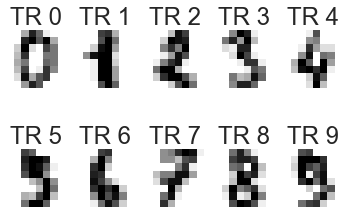

In [6]:
#Visualize the images
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('TR %i' % label)

### Pre-processing

In [7]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

#Verify if the shape is now (1797, 64)
data.shape

(1797, 64)

In [8]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
#Let's split the dataset into half
half = n_samples // 2

X_train = data[:half]
X_test = data[half:]

y_train = digits.target[:half]
y_test = digits.target[half:]

#Test Images for Visualization 
X_test_images = digits.images[half:]

#Check the shape to verify if everything is in order
X_train.shape, y_train.shape, X_test.shape,  y_test.shape, X_test_images.shape,

((898, 64), (898,), (899, 64), (899,), (899, 8, 8))

### Training the Model

In [10]:
#Set the value of K
k = 3

#Instatiate the model
knn = KNeighborsClassifier(n_neighbors=k)

#Fit the model to the training set
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Validate the Model

In [12]:
#Predict on the Test Set
y_pred = knn.predict(X_test)

In [13]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.99      0.98        91
           2       0.99      0.94      0.96        86
           3       0.91      0.92      0.92        91
           4       0.99      0.93      0.96        92
           5       0.97      0.97      0.97        91
           6       0.99      1.00      0.99        91
           7       0.98      1.00      0.99        89
           8       0.94      0.95      0.95        88
           9       0.91      0.93      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




In [14]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  1  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  0 84  0  1  0  2  3  1]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  2  1  1  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]


Text(0.5, 23.5, 'Predicted label')

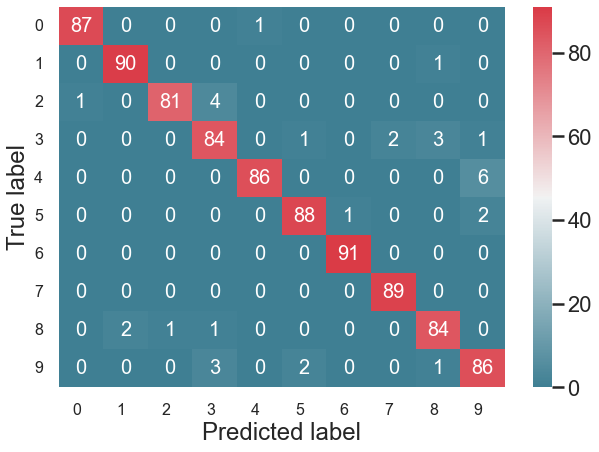

In [15]:
#Plot the confusion matrix for easier viewing
cm = metrics.confusion_matrix(y_test, y_pred)

labels=[0,1,2,3,4,5,6,7,8,9]

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

#Plot attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap = sns.heatmap(df_cm,annot=True, annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [16]:
#Load the X_test images with their predictions
images_and_predictions = list(zip(X_test_images, y_pred))

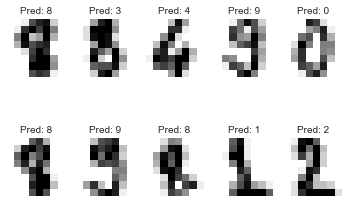

In [17]:
#Visualize a sample of the results
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Pred: %i' % prediction, fontdict={'fontsize':10})

plt.show()